## Домашняя работа

Вам дан датасет с данными о маркетинговой компании.

https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign

### Easy (+0.1)

Посчитать:

- Количество жалоб
- Средний возраст покупателей. Покупатель - тот, кто совершал хотя бы одну покупку за последние два года (колонки Mnt*). Отличается ли он от среднего возраста всех людей в датасете?

In [1]:
import pandas as pd

df = pd.read_csv('../data/marketing_campaign.csv', delimiter=';')

cnt_complains = df['Complain'].value_counts()[1]
print(f'Количество жалоб: {cnt_complains}')

Количество жалоб: 21


/tmp/ipykernel_375/712154048.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
avg_age = df['Year_Birth'].mean() 
mnt_columns = df.filter(regex='Mnt', axis=1) # находим все колонки с припиской Mnt
customers = df[(mnt_columns != 0).any(axis=1)]
avg_buyer_age = customers['Year_Birth'].mean()

print(avg_age)
print(avg_buyer_age)
print(f'вывод: они равны')

1968.8058035714287
1968.8058035714287
вывод: они равны


### Medium (+0.4)

Постройте графики и визуально оцените, есть ли зависимости между колонками:

- Education
- Marital_Status
- Income
- Kidhome
- Teenhome
- Recency
- NumWebPurchases
- NumStorePurchases
- возраст

Кратко напишите выводы.

### Hard (+ в карму)

Вы - аналитик в магазине. Маркетологи сказали, что следующую компанию хотели бы запустить на целевую аудиторию магазина.

Предложите подход как понять, что такое "целевая аудитория", обоснуйте его при помощи данных и найдите ID покупателей, которые относятся к ним.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/marketing_campaign.csv', delimiter=';')
all_labels = ('Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'NumWebPurchases', 'Year_Birth')

In [4]:
def plot_graph(x, y):
    fig, axs = plt.subplots()
    axs.scatter(df[x], df[y])
    axs.set_xlabel(x)
    axs.set_ylabel(y)

    plt.show() 

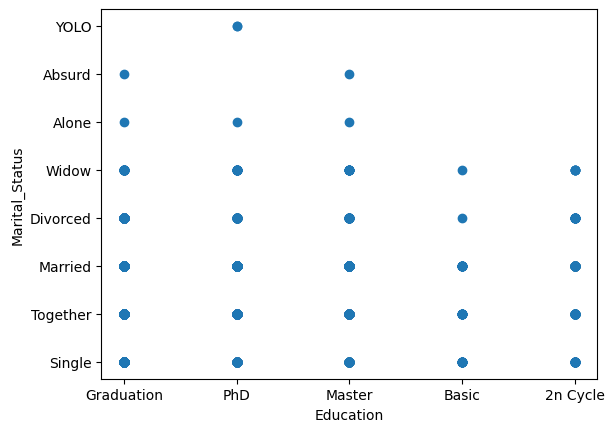

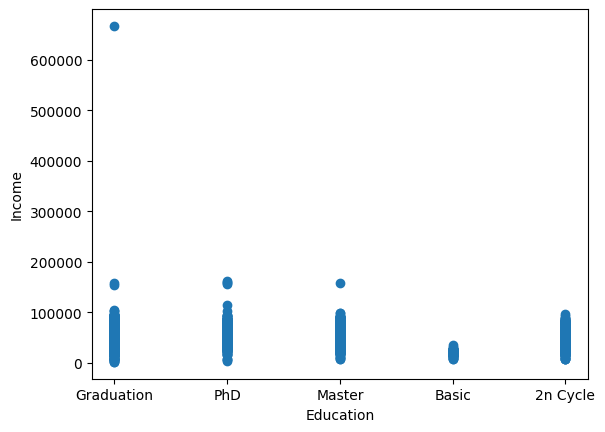

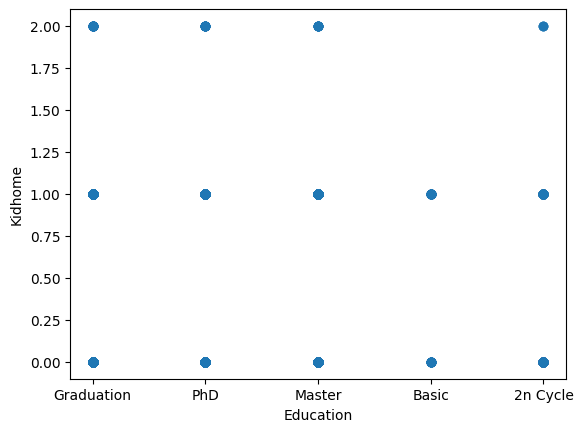

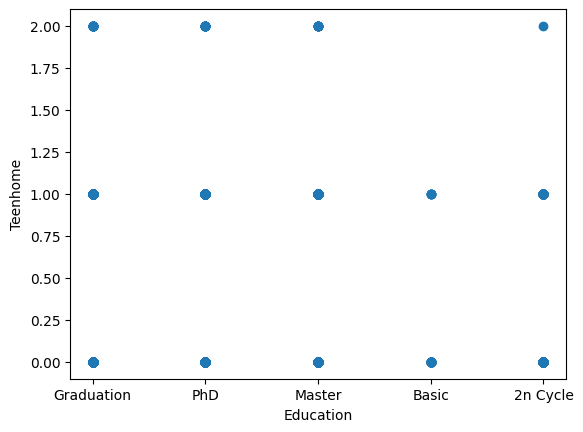

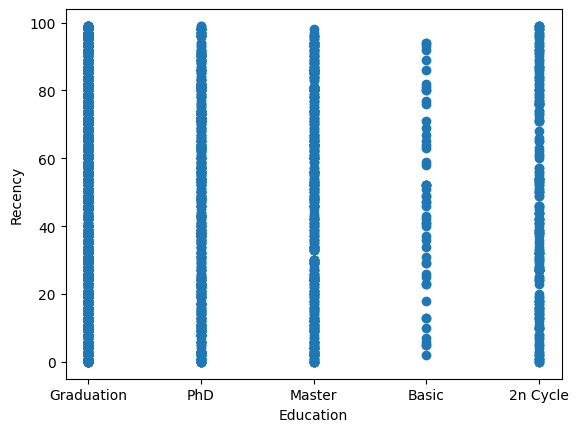

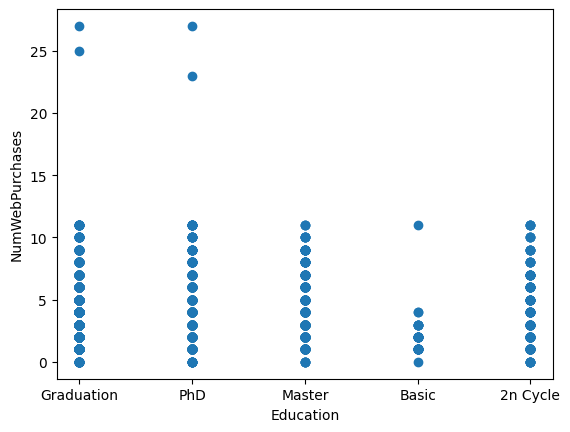

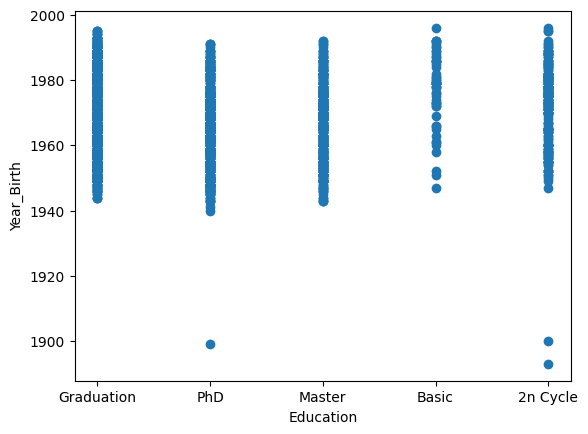

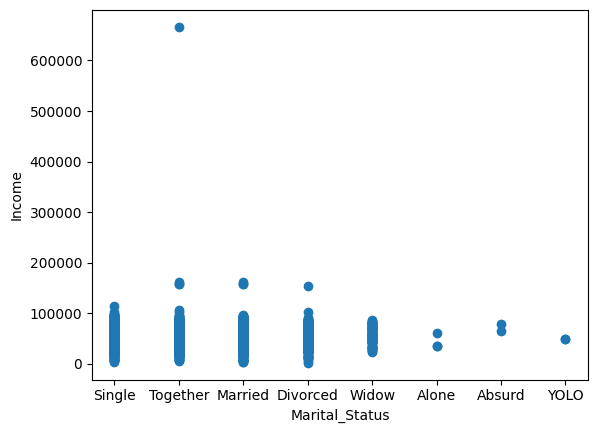

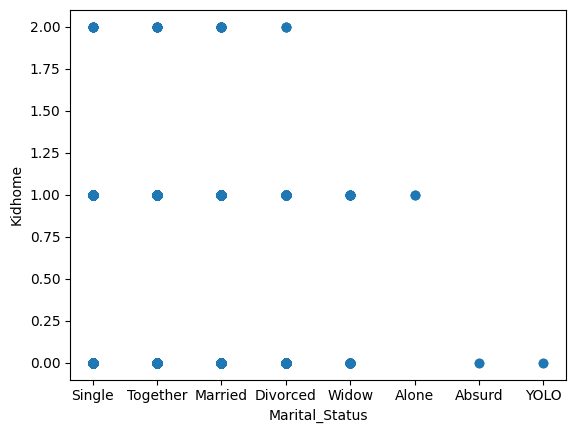

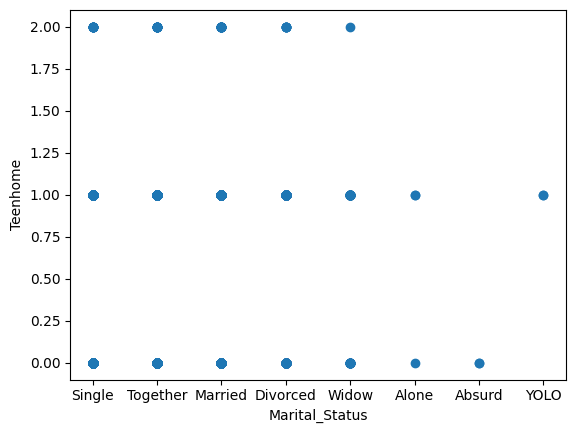

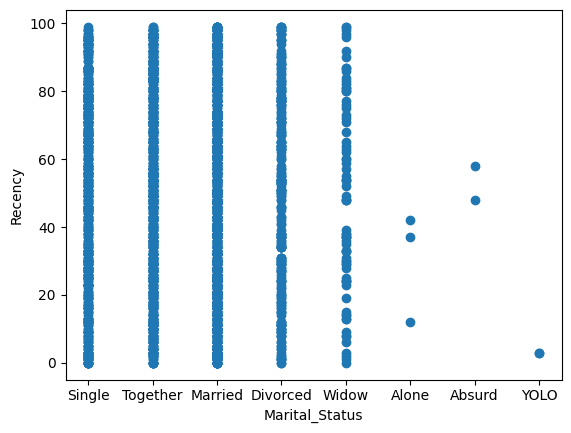

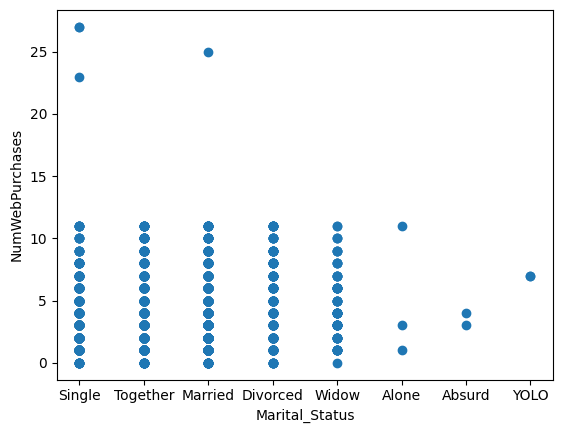

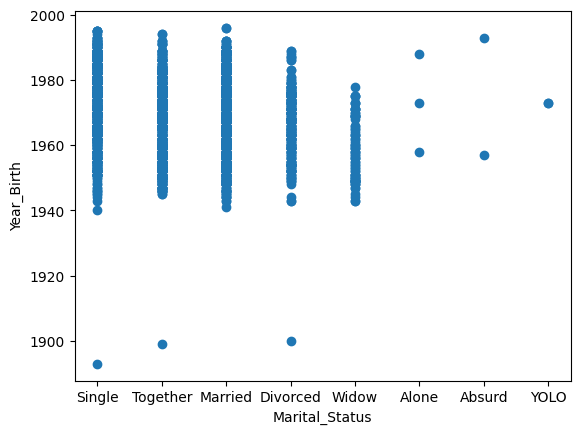

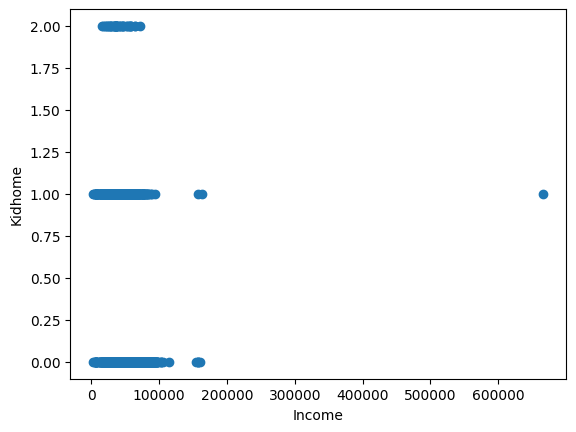

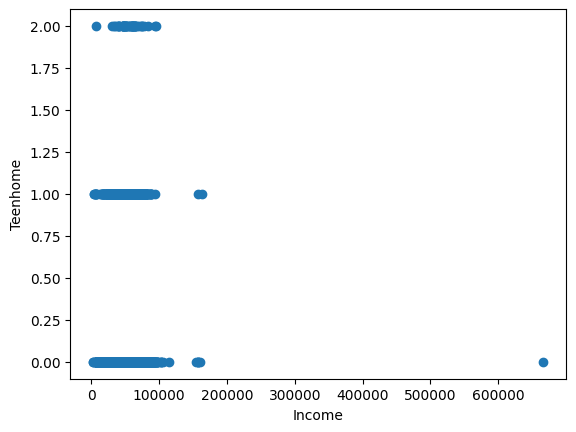

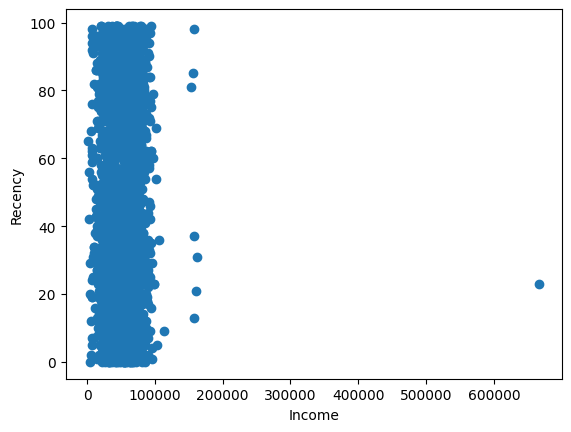

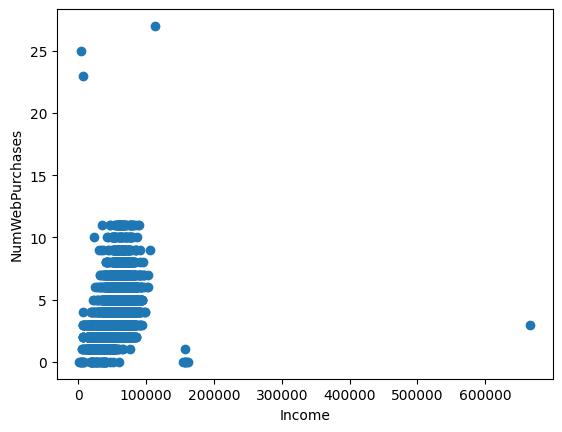

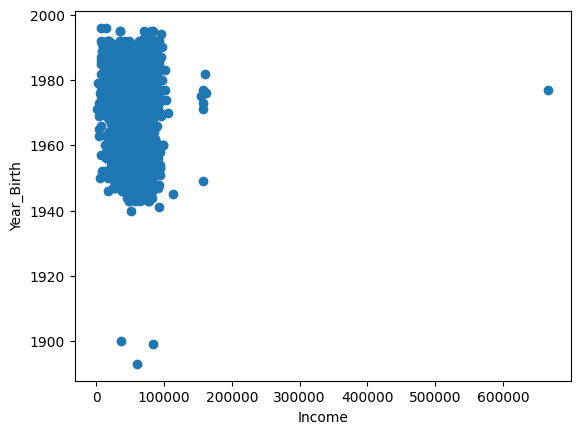

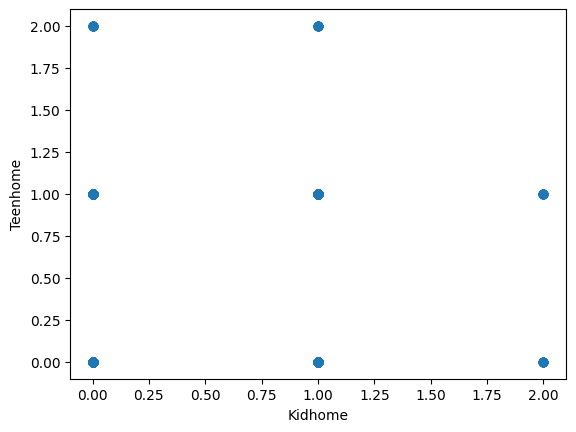

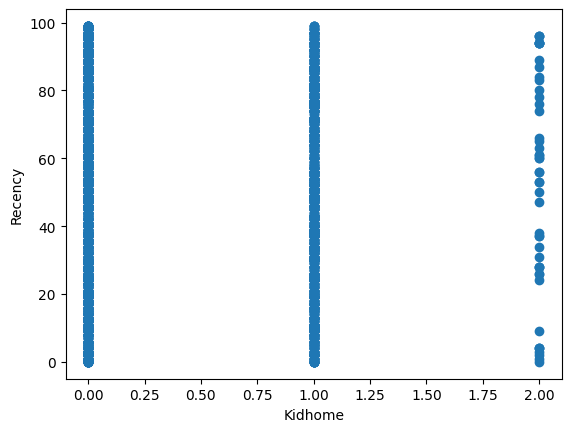

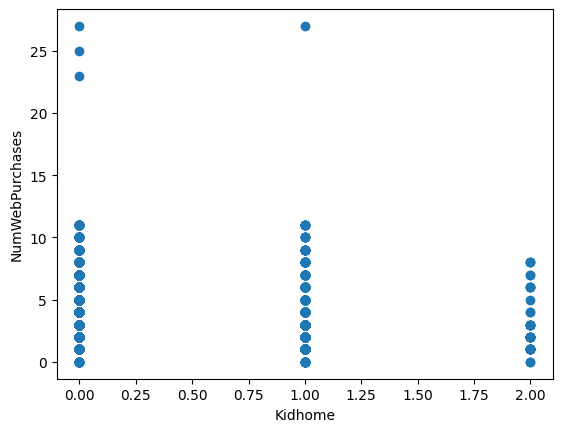

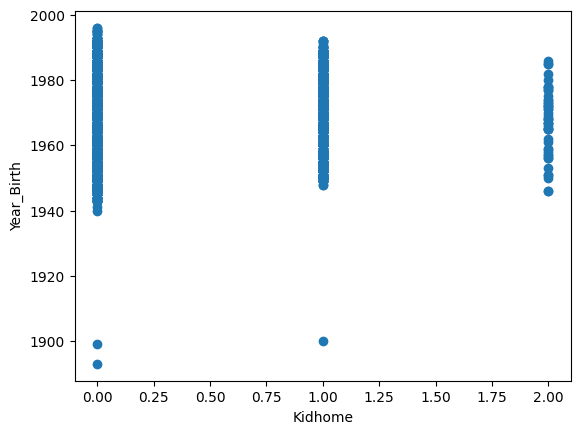

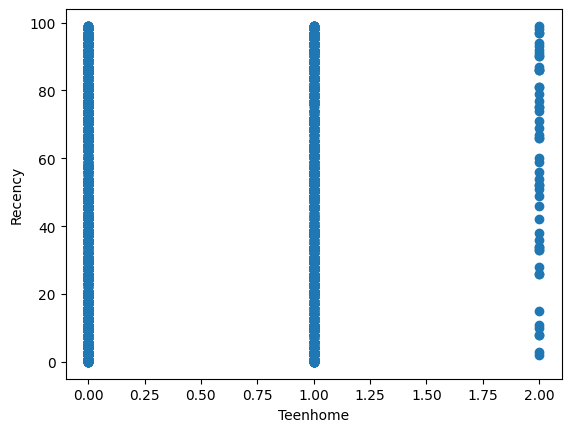

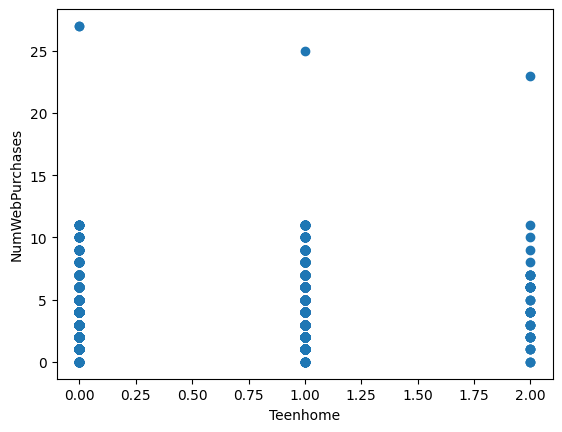

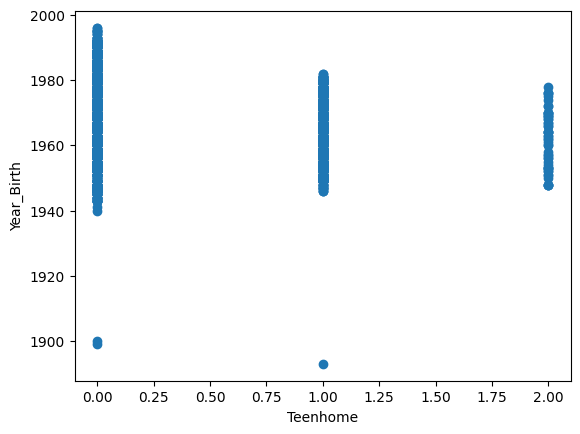

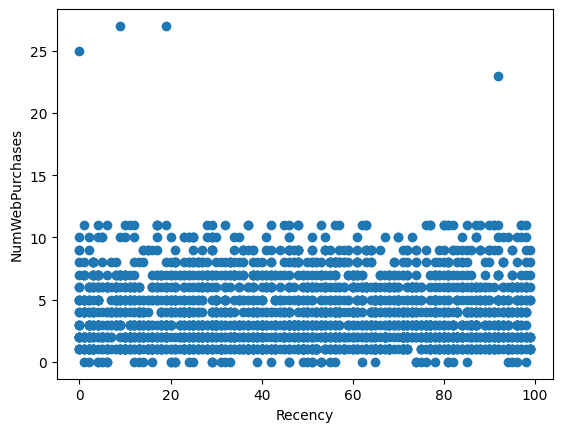

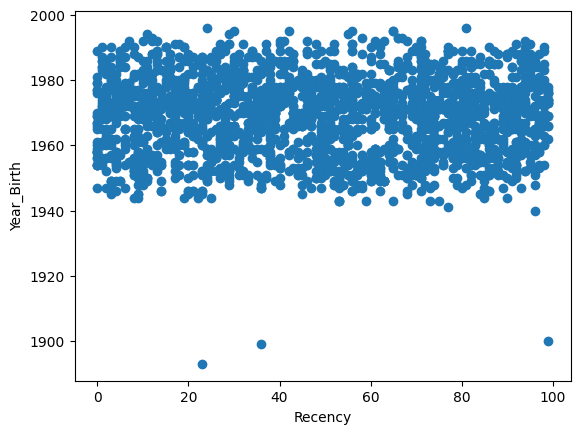

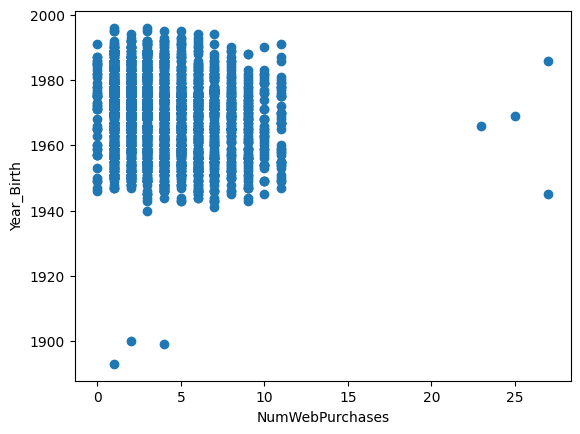

In [5]:
for x in range(len(all_labels)):
    for y in range(x + 1, len(all_labels)):
        plot_graph(all_labels[x], all_labels[y])

Число покупок в интернете у людей до 1940 года, либо ноль, либо очень мало  
В среднем, число покупок в магазине у людей больше, чем на веб-сайте  
Люди разных возрастов покупают примерно одинаковое количество вещей в магазине  
Очевидный факт, но, чем больше у человека доход, тем большее количество покупок он делает\n
В целом у людей, закончивших бакалавриат и выше, годовой доход семьи больше, чем у людей с базовым образованием\n